In [1]:
#Importing relevant packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

In [2]:
#Grabbing the data and looking at initial values
df = pd.read_excel('E:\HDD Docs\Career Stuff\Deloitte\DEM_Challenge_Section1_DATASET.xlsx')
df.head()

,id,first_name,last_name,email,gender,ip_address
0,1,Margaretta,Laughtisse,mlaughtisse0@mediafire.com,Genderfluid,34.148.232.131
1,2,Vally,Garment,vgarment1@wisc.edu,Bigender,15.158.123.36
2,3,Tessa,Curee,tcuree2@php.net,Bigender,132.209.143.225
3,4,Arman,Heineking,aheineking3@tuttocitta.it,Male,157.110.61.233
4,5,Roselia,Trustie,rtrustie4@ft.com,Non-binary,49.55.218.81


In [3]:
#Checking column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
 4   gender      1000 non-null   object
 5   ip_address  1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [4]:
#Looking for null/missing values within columns
df.isnull().sum()

id            0
first_name    0
last_name     0
email         0
gender        0
ip_address    0
dtype: int64

In [5]:
#Checking for duplicate email entries
df2 = df[df.duplicated('email', keep=False)]
df2.head()

,id,first_name,last_name,email,gender,ip_address


In [6]:
# Define a function to classify email domains into general categories
def categorize_domain(domain):
    # Check if the domain is academic (ends with .edu)
    if domain.endswith('.edu'):
        return 'Academic'
    # Check if the domain is a common personal email provider
    elif domain in ['gmail.com', 'yahoo.com', 'outlook.com']:
        return 'Personal'
    # Otherwise, treat it as a corporate or less common domain
    else:
        return 'Corporate'

In [7]:
# Extract the domain portion from each email address
df['email_domain'] = df['email'].str.split('@').str[-1]

# Apply the domain categorization function to create a new column
df['email_type'] = df['email_domain'].apply(categorize_domain)

In [8]:
#The dataset looks exceptionally clean--so I begin to think of business applications
#The gender column is fantastic, but campaign strategy will likely segment into one of three values
#Let's check how many values exist and see if we can group in

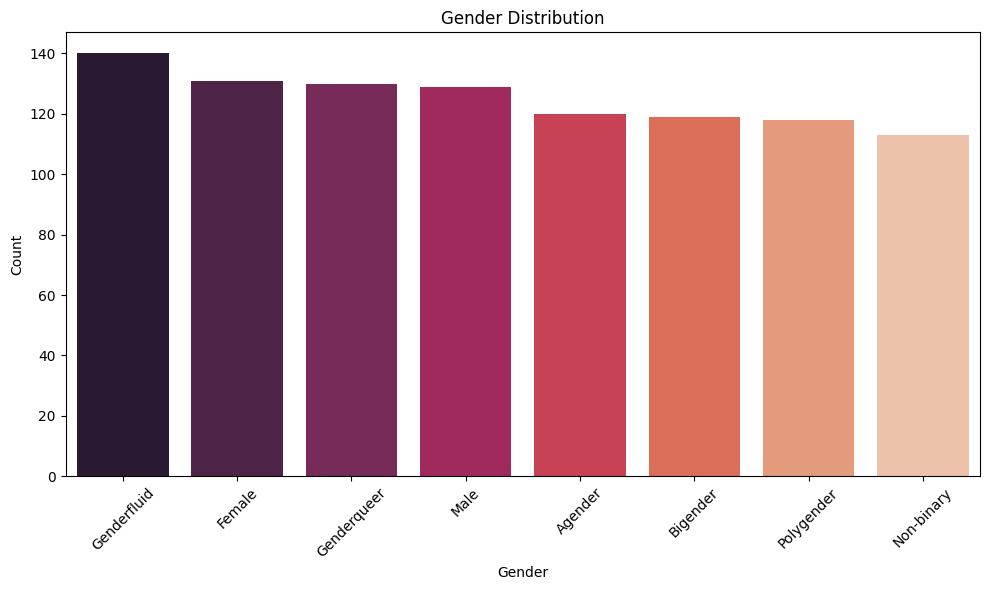

In [9]:
#Count values
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_counts, x='gender', y='count', hue='gender', palette='rocket', legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
#Define a function to categorize gender values into broader groups
def simplify_gender(g):
#Normalize and categorize binary genders
    if g.lower() in ['male', 'female']:
        return 'Binary'
#Identify and group nonbinary or gender-diverse entries
    elif 'non' in g.lower() or 'gender' in g.lower():
        return 'Nonbinary'
#Everything else (e.g., undefined, uncommon labels) goes into 'Other'
    else:
        return 'Other'

In [11]:
#Apply the function to the 'gender' column to create a new simplified column
df['gender_group'] = df['gender'].apply(simplify_gender)
df.head()

,id,first_name,last_name,email,gender,ip_address,email_domain,email_type,gender_group
0,1,Margaretta,Laughtisse,mlaughtisse0@mediafire.com,Genderfluid,34.148.232.131,mediafire.com,Corporate,Nonbinary
1,2,Vally,Garment,vgarment1@wisc.edu,Bigender,15.158.123.36,wisc.edu,Academic,Nonbinary
2,3,Tessa,Curee,tcuree2@php.net,Bigender,132.209.143.225,php.net,Corporate,Nonbinary
3,4,Arman,Heineking,aheineking3@tuttocitta.it,Male,157.110.61.233,tuttocitta.it,Corporate,Binary
4,5,Roselia,Trustie,rtrustie4@ft.com,Non-binary,49.55.218.81,ft.com,Corporate,Nonbinary


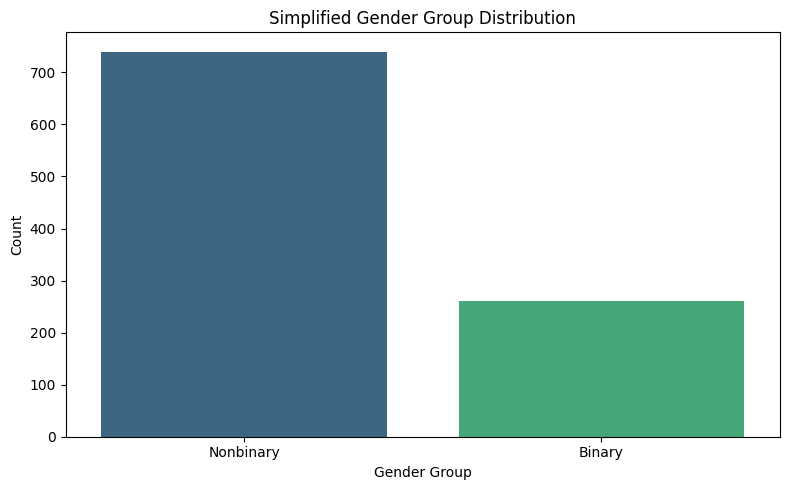

In [12]:
#Count values in the new gender_group column
gender_group_counts = df['gender_group'].value_counts().reset_index()
gender_group_counts.columns = ['gender_group', 'count']

#Create the plot
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_group_counts, x='gender_group', y='count', hue='gender_group', palette='viridis', legend=False)
plt.title("Simplified Gender Group Distribution")
plt.xlabel("Gender Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [13]:
#Define database connection parameters
username = 'nina'
password = 'password123'
host = 'localhost'
port = '5432'
database = 'challenge_db'
table_name = 'chemberta_dataset'

In [14]:
# Create connection string and engine
connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)

# Load DataFrame to PostgreSQL
df.to_sql(table_name, engine, if_exists='replace', index=False)

1000

In [15]:
# Confirm successful data load with a status message
print(f"Data loaded into PostgreSQL table: {table_name}")

Data loaded into PostgreSQL table: chemberta_dataset
